# Identify:

Please fill-in your ID in the following cell, **only id numbers, no names!**


<div style="direction:rtl"> 
מלאו בתא הבא את מספר הת.ז שלכם. רק מספר ת.ז., ללא שמות!!  
</div>

In [1]:
id1 = "206239568"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

In [3]:
df = pd.DataFrame([id1])

In [4]:
df.to_clipboard(index=False,header=False)

---

----

In [5]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/hotel_bookings.csv'
data = pd.read_csv(url)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# Q1 
איור המציג את התפלגות מספר הלילות בהזמנות בסופי שבוע - חשוב לוג סקייל כדי לראות את הפיזור כמו שצריך החל מחמישה ימים והלאה

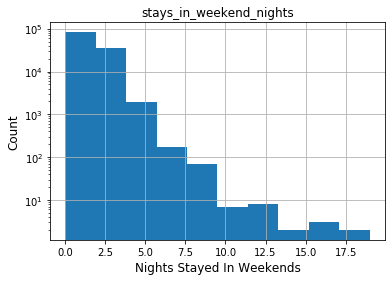

In [23]:
df1 = data["stays_in_weekend_nights"]
df1 = pd.DataFrame(df1)
df1.hist()
plt.yscale('log')
plt.xlabel("Nights Stayed In Weekends",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

 # Q2
 ליצור דאטהפריים חדש המכיל רק הזמנות לאוגוסט בהן מספר התינוקות גדול מאפס, להציג את חמשת השורות הראשונות שלו ואת אורכו.

In [30]:
df2 = data.loc[(data.arrival_date_month=="August")]
df2 = data.loc[(data.babies>0)]
print("The number of rows we have in this new DataFrame is "+str(len(df2)))
display(df2.head())

The number of rows we have in this new DataFrame is 917


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
109,Resort Hotel,0,102,2015,July,27,4,2,5,2,...,No Deposit,240.0,NaN,0,Transient,73.8,0,2,Check-Out,2015-07-11
111,Resort Hotel,0,78,2015,July,27,4,2,5,2,...,No Deposit,240.0,NaN,0,Transient,139.0,0,2,Check-Out,2015-07-11
165,Resort Hotel,0,84,2015,July,28,6,1,3,2,...,No Deposit,240.0,NaN,0,Transient,97.0,0,2,Check-Out,2015-07-10
236,Resort Hotel,0,78,2015,July,28,9,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,2,Check-Out,2015-07-12
264,Resort Hotel,0,21,2015,July,28,10,2,3,2,...,No Deposit,250.0,NaN,0,Transient,165.0,1,3,Check-Out,2015-07-15


# Q3
איור המציג השוואה בין שני סוגי המלונות מבחינת כמות ההזמנות בכל סטטוס.

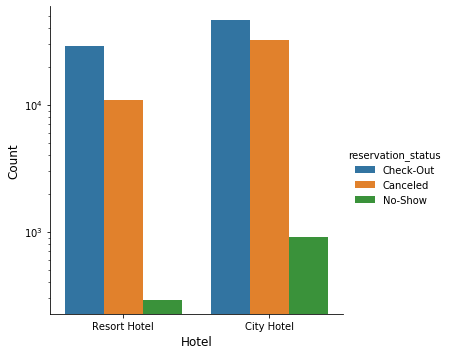

In [56]:
df3 = data[["hotel","reservation_status"]]

sns.catplot(x="hotel", hue="reservation_status", kind="count", data=df3)
plt.yscale('log')
plt.xlabel("Hotel",fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

# Q4
טבלה המציגה את סך הכל מספר המבוגרים בכל חודש בשני סוגי המלונות.

In [122]:
df4 = data[["hotel","arrival_date_month","adults"]]
month_list = ["January","February","March","April","May","June","July","August","September","October","November","December"]
df4 = df4.groupby(["hotel","arrival_date_month"])[["arrival_date_month","adults"]].sum()
df4

adults
hotel        arrival_date_month        
City Hotel   April                14290
             August               17841
             December              7609
             February              8846
             January               6378
             July                 15975
             June                 14519
             March                11858
             May                  14958
             November              7330
             October              13665
             September            13569
Resort Hotel April                 6516
             August                9954
             December              4773
             February              5604
             January               3646
             July                  9189
             June                  5834
             March                 5817
             May                   6581
             November              4158
             October               6614
             September             6112

# Q5
בדקו האם קיימת קורלציה בין הפיצ'רס המופיעים בקובץ,
צרו סקאטרפלוט עבור הקורלציה החיובית השלישית הכי חזקה שמצאתם

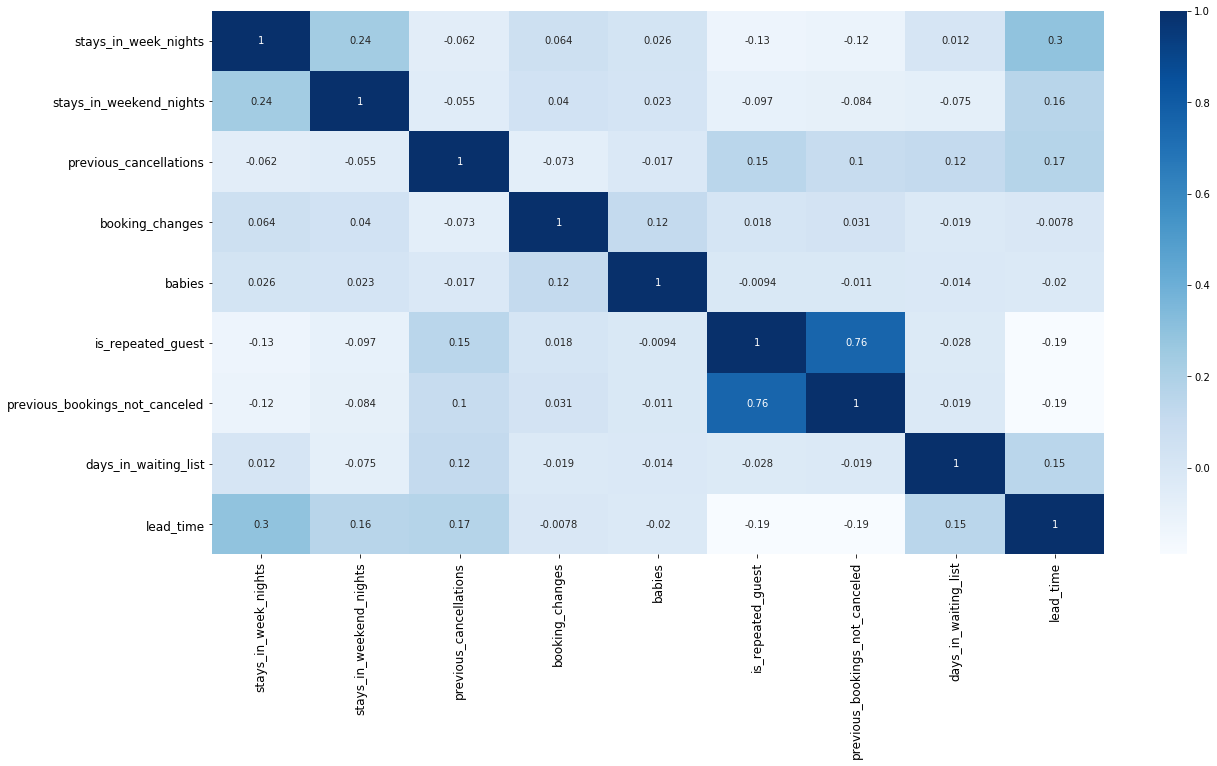

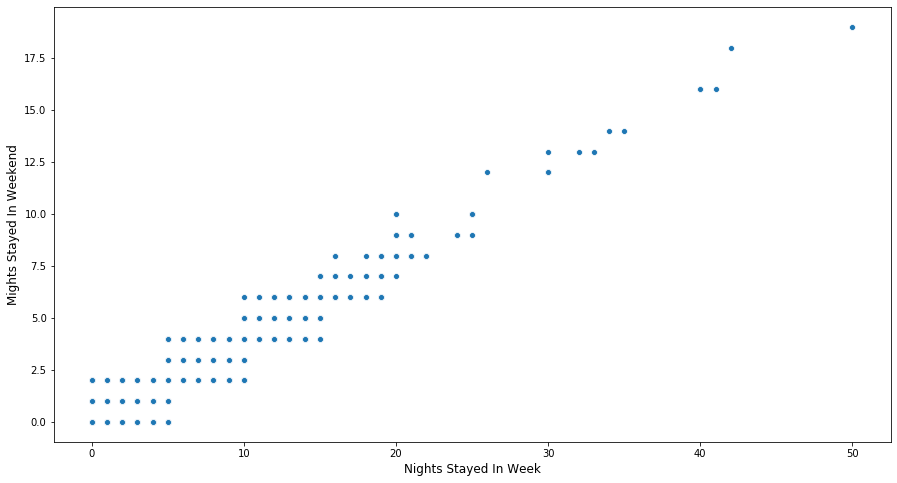

In [101]:
features = ['stays_in_week_nights', 'stays_in_weekend_nights', 'previous_cancellations', 'booking_changes',
            'babies', 'is_repeated_guest','previous_bookings_not_canceled','days_in_waiting_list', 'lead_time']
df5 = data[features]

corr_df = df5.corr(method='spearman')
plt.figure(figsize = (20,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.heatmap(data=corr_df,cmap='Blues', annot=True)
plt.show()


plt.figure(figsize = (15,8))
sns.scatterplot(data=df5, x="stays_in_week_nights", y="stays_in_weekend_nights",palette="deep")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Nights Stayed In Week",fontsize=12)
plt.ylabel("Mights Stayed In Weekend",fontsize=12)
plt.show()

# Q6
צרו מודל המנבא האם ההזמנה בוטלה על סמך הפיצ'רס המופיעים בקובץ, הציגו את הדיוק של המודל.
כתבו במילים במארקדאון בתוך הקובץ האם הדיוק שקיבלנו יותר טוב מדיוק מקרי? נמקו

In [116]:
features = ['stays_in_week_nights', 'stays_in_weekend_nights','customer_type', 'previous_cancellations', 'booking_changes',
            'babies', 'is_repeated_guest','previous_bookings_not_canceled','days_in_waiting_list', 'lead_time', 'is_canceled' ]
df6=data[features]

df6_dummies = pd.get_dummies(df6['customer_type'])
df6 = pd.concat([df6, df6_dummies], axis=1)
df6.drop(["customer_type"],axis=1,inplace=True)
features.remove('customer_type')


x = df6[features]
y = df6['is_canceled']

x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x,y,test_size=0.3,random_state=42)
model1 = sk.tree.DecisionTreeClassifier(criterion="gini")
model1 = model1.fit(x_train,y_train)

prediction1 = model1.predict(x_test)

acc = sk.metrics.accuracy_score(prediction1, y_test)*100
print("The accuracy of the prediction is "+str(acc)+" precent")

The accuracy of the prediction is 100.0 precent


אנחנו רואים שהמודל שבנינו מדויק במאה אחוז, זאת אומרת שעל סמך הפיצ'רס הנתונים לנו אנחנו יכולים לנבא בצורה מדויקת האם ההזמנה בוטלה.
הדיוק מושלם לפי המודל שבנינו ולכן הרבה יותר טוב מדיוק מקרי !

---
# GOOD LUCK !!!!
---

In [28]:
# do not type below this line